In [1]:
# Install Libraries
!pip install textblob
!pip install tweepy


In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt 
import string

#import emoji
import nltk
nltk.download('stopwords')
from textblob import TextBlob
words = set(nltk.corpus.words.words())
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
from keras.preprocessing.image import ImageDataGenerator
# ML Libraries
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC, SVC
from nltk.classify import NaiveBayesClassifier, MaxentClassifier, SklearnClassifier


# Global Parameters
stop_words = set(stopwords.words('english'))

# new_stop = (['abov', 'ani', 'becaus', 'befor', 'could', 
            #  'doe', 'dure', 'might', 'must', "n't", 'need', 'onc', 
           #   'onli', 'ourselv', 'sha', 'themselv', 'veri', 'whi', 'would', 'yourselv', 'covidvaccin',
            # 'vaccin', 'covid', 'coronavirus'])




# stop = stop + new_stop


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prave\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
tweet_df = pd.read_csv('C:/Users/prave/Module-20/vaccination_all_tweets.csv/vaccination_all_tweets.csv',encoding = 'ISO-8859-1') 
tweet_df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,elið±ð¹ðªðºð,Your Bed,"heil, hydra ðâº",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [4]:
tweet_df =tweet_df.drop(columns = [ 'user_location','user_description','user_created','user_verified'
                         ,'user_favourites','source','is_retweet'], axis = 1)
tweet_df

,id,user_name,user_followers,user_friends,date,text,hashtags,retweets,favorites
0,1340539111971516416,Rachel Roh,405,1692,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],0,0
1,1338158543359250433,Albert Fong,834,666,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,1,1
2,1337858199140118533,elið±ð¹ðªðºð,10,88,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",0,0
3,1337855739918835717,Charles Adler,49165,3933,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,446,2129
4,1337854064604966912,Citizen News Channel,152,580,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",0,0
...,...,...,...,...,...,...,...,...,...
228202,1460170772299665408,VaxBLR,31,0,2021-11-15 09:00:15,45+ #URBAN #Bengaluru #CovidVaccine Availabili...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISH...",0,0
228203,1460163268262051841,VaxBLR,31,0,2021-11-15 08:30:26,18-44 #BBMP #Bengaluru #CovidVaccine Availabil...,"['BBMP', 'Bengaluru', 'CovidVaccine', 'COVISHI...",0,1
228204,1460163224221851655,VaxBLR,31,0,2021-11-15 08:30:15,18-44 #URBAN #Bengaluru #CovidVaccine Availabi...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISH...",0,0
228205,1460156376995573765,Gatti Valentinoð¾,8103,3113,2021-11-15 08:03:03,They promote their Vaccines leaving out the st...,['SputnikV'],0,0


In [5]:
#regex the hashtags 
tweet_df['hashtags'] = tweet_df['hashtags'].str.replace("[^a-zA-Z#]", " ")
tweet_df.head()

C:\Users\prave\AppData\Local\Temp/ipykernel_18448/3696659988.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  tweet_df['hashtags'] = tweet_df['hashtags'].str.replace("[^a-zA-Z#]", " ")


,id,user_name,user_followers,user_friends,date,text,hashtags,retweets,favorites
0,1340539111971516416,Rachel Roh,405,1692,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,PfizerBioNTech,0,0
1,1338158543359250433,Albert Fong,834,666,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,1,1
2,1337858199140118533,elið±ð¹ðªðºð,10,88,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,coronavirus SputnikV AstraZeneca Pf...,0,0
3,1337855739918835717,Charles Adler,49165,3933,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,446,2129
4,1337854064604966912,Citizen News Channel,152,580,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,whereareallthesickpeople PfizerBioNTech,0,0


In [6]:
def clean_tweet(temp):
    temp = str(temp).lower()
    temp = re.sub("'", "", str(temp)) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", str(temp))
    temp = re.sub("#[A-Za-z0-9_]+","", str(temp))
    temp = re.sub(r"www.\S+", "", temp)
    temp = re.sub(r"http\S+", "", temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = temp.split()
    stopwords =  stop_words
    temp = [w for w in temp if not w in stopwords]
    temp = " ".join(word for word in temp)
    return temp
tweet_df['text'] = tweet_df['text'].map(lambda x: clean_tweet(x))
tweet_df.head()

,id,user_name,user_followers,user_friends,date,text,hashtags,retweets,favorites
0,1340539111971516416,Rachel Roh,405,1692,2020-12-20 06:06:44,folks said daikon paste could treat cytokine s...,PfizerBioNTech,0,0
1,1338158543359250433,Albert Fong,834,666,2020-12-13 16:27:13,world wrong side history year hopefully bigges...,NaN,1,1
2,1337858199140118533,elið±ð¹ðªðºð,10,88,2020-12-12 20:33:45,russian vaccine created last 2 4 years,coronavirus SputnikV AstraZeneca Pf...,0,0
3,1337855739918835717,Charles Adler,49165,3933,2020-12-12 20:23:59,facts immutable senator even youre ethically s...,NaN,446,2129
4,1337854064604966912,Citizen News Channel,152,580,2020-12-12 20:17:19,explain need vaccine,whereareallthesickpeople PfizerBioNTech,0,0


In [7]:
#remove short words less than three letters 
tweet_df['text'] = tweet_df['text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
tweet_df

,id,user_name,user_followers,user_friends,date,text,hashtags,retweets,favorites
0,1340539111971516416,Rachel Roh,405,1692,2020-12-20 06:06:44,folks said daikon paste could treat cytokine s...,PfizerBioNTech,0,0
1,1338158543359250433,Albert Fong,834,666,2020-12-13 16:27:13,world wrong side history year hopefully bigges...,NaN,1,1
2,1337858199140118533,elið±ð¹ðªðºð,10,88,2020-12-12 20:33:45,russian vaccine created last years,coronavirus SputnikV AstraZeneca Pf...,0,0
3,1337855739918835717,Charles Adler,49165,3933,2020-12-12 20:23:59,facts immutable senator even youre ethically s...,NaN,446,2129
4,1337854064604966912,Citizen News Channel,152,580,2020-12-12 20:17:19,explain need vaccine,whereareallthesickpeople PfizerBioNTech,0,0
...,...,...,...,...,...,...,...,...,...
228202,1460170772299665408,VaxBLR,31,0,2021-11-15 09:00:15,availability 30pm free slots paid slots dose1,URBAN Bengaluru CovidVaccine COVISH...,0,0
228203,1460163268262051841,VaxBLR,31,0,2021-11-15 08:30:26,availability 00pm free slots dose1 1676 dose2,BBMP Bengaluru CovidVaccine COVISHI...,0,1
228204,1460163224221851655,VaxBLR,31,0,2021-11-15 08:30:15,availability 00pm free slots paid slots dose,URBAN Bengaluru CovidVaccine COVISH...,0,0
228205,1460156376995573765,Gatti Valentinoð¾,8103,3113,2021-11-15 08:03:03,promote vaccines leaving stronger vaccine,SputnikV,0,0


# TOKENIZIATION

In [8]:
tokenized_tweets = tweet_df['text'].apply(lambda x: x.split())
tokenized_tweets.head()

0    [folks, said, daikon, paste, could, treat, cyt...
1    [world, wrong, side, history, year, hopefully,...
2             [russian, vaccine, created, last, years]
3    [facts, immutable, senator, even, youre, ethic...
4                             [explain, need, vaccine]
Name: text, dtype: object

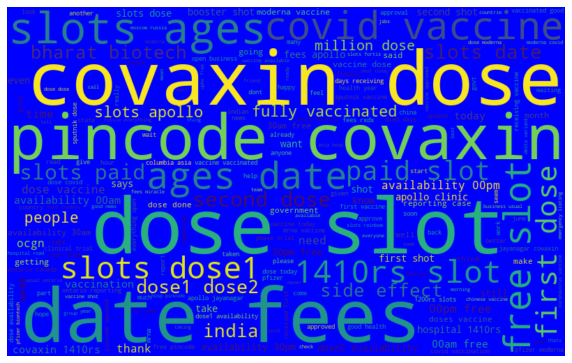

In [9]:
#plotting all words out of text
words = ' '.join([text for text in tweet_df['text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,background_color='blue').generate(words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [18]:
#Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word. 
stemmer = PorterStemmer()
tokenized_tweets = tokenized_tweets.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tweet_df['tokenized']= tokenized_tweets
tweet_df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,tokenized
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,folks said daikon paste could treat cytokine s...,['PfizerBioNTech'],Twitter for Android,0,0,False,"[folk, said, daikon, past, could, treat, cytok..."
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,world wrong side history year hopefully bigges...,NaN,Twitter Web App,1,1,False,"[world, wrong, side, histori, year, hope, bigg..."
2,1337858199140118533,elið±ð¹ðªðºð,Your Bed,"heil, hydra ðâº",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,russian vaccine created last years,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,"[russian, vaccin, creat, last, year]"
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,facts immutable senator even youre ethically s...,NaN,Twitter Web App,446,2129,False,"[fact, immut, senat, even, your, ethic, sturdi..."
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,explain need vaccine,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,"[explain, need, vaccin]"


# Text Classification using TextBlob

In [10]:
from textblob import TextBlob

def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

def get_sentiment(score):
    if score > 0:
        return 'Positive'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Negative'

In [11]:
tweet_df['subjectivity'] = tweet_df['text'].apply(get_subjectivity)
tweet_df['polarity'] = tweet_df['text'].apply(get_polarity)
tweet_df['sentiment'] = tweet_df['polarity'].apply(get_sentiment)
tweet_df.head(10)

,id,user_name,user_followers,user_friends,date,text,hashtags,retweets,favorites,subjectivity,polarity,sentiment
0,1340539111971516416,Rachel Roh,405,1692,2020-12-20 06:06:44,folks said daikon paste could treat cytokine s...,PfizerBioNTech,0,0,0.000000,0.000,Neutral
1,1338158543359250433,Albert Fong,834,666,2020-12-13 16:27:13,world wrong side history year hopefully bigges...,NaN,1,1,0.900000,-0.500,Negative
2,1337858199140118533,elið±ð¹ðªðºð,10,88,2020-12-12 20:33:45,russian vaccine created last years,coronavirus SputnikV AstraZeneca Pf...,0,0,0.033333,0.000,Neutral
3,1337855739918835717,Charles Adler,49165,3933,2020-12-12 20:23:59,facts immutable senator even youre ethically s...,NaN,446,2129,0.550000,0.100,Positive
4,1337854064604966912,Citizen News Channel,152,580,2020-12-12 20:17:19,explain need vaccine,whereareallthesickpeople PfizerBioNTech,0,0,0.000000,0.000,Neutral
5,1337852648389832708,Dee,105,108,2020-12-12 20:11:42,anyone useful advice guidance whether covid va...,NaN,0,0,0.250000,0.400,Positive
6,1337851215875608579,Gunther Fehlinger,2731,5001,2020-12-12 20:06:00,claim fame success patriotic competition canada,vaccination,0,4,0.000000,0.300,Positive
7,1337850832256176136,Dr.Krutika Kuppalli,21924,593,2020-12-12 20:04:29,many bright days 2020 best winning,BidenHarris Election,2,22,0.587500,0.675,Positive
8,1337850023531347969,Erin Despas,887,1515,2020-12-12 20:01:16,covid vaccine getting,CovidVaccine covid PfizerBioNTech ...,2,1,0.000000,0.000,Neutral
9,1337842295857623042,Ch.Amjad Ali,671,2368,2020-12-12 19:30:33,states start getting monday says,CovidVaccine COVID Vaccine US paku...,0,0,0.000000,0.000,Neutral


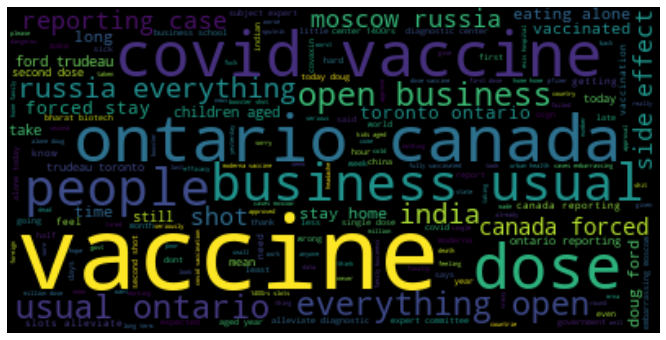

In [12]:
# Generate a word cloud image
stopwords = set(STOPWORDS)
neg_words=(' '.join([text for text in tweet_df['text'][tweet_df['sentiment'] =='Negative']]))
wordcloud = WordCloud(stopwords = stopwords, background_color = "black", max_words = 1000).generate(neg_words)
# create twitter image
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
# store to file
plt.show()

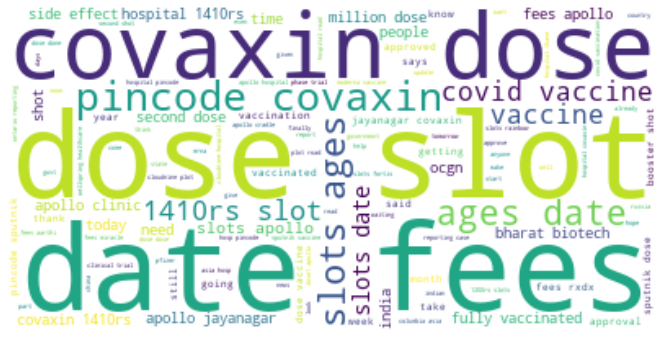

In [13]:
# Generate a word cloud image
stopwords = set(STOPWORDS)
neu_words=' '.join([text for text in tweet_df['text'][tweet_df['sentiment'] == 'Neutral']])
wordcloud = WordCloud(stopwords = stopwords, background_color = "white", max_words = 1000).generate(neu_words)
# create twitter image
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
# store to file
plt.savefig("vaccine.png", format = "png")
plt.show()

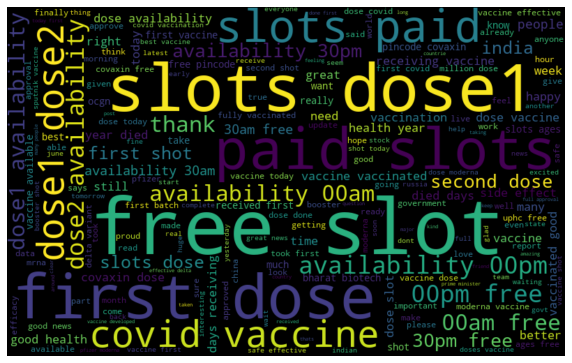

In [14]:
#plotting positive words 
pos_words = ' '.join([text for text in tweet_df['text'][tweet_df['sentiment'] =='Positive']])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(pos_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [15]:
import itertools
import collections
#count the most words shown up in pos_words
count_pos = collections.Counter(pos_words.split())
count_pos.most_common(15)

[('vaccine', 16781),
 ('slots', 13301),
 ('first', 12415),
 ('dose', 11426),
 ('free', 10354),
 ('availability', 7063),
 ('covid', 6098),
 ('dose1', 5758),
 ('paid', 4243),
 ('good', 4127),
 ('shot', 4111),
 ('today', 4103),
 ('vaccines', 3780),
 ('vaccinated', 3576),
 ('dose2', 3537)]

In [16]:
count_neg = collections.Counter(neg_words.split())
count_neg.most_common(15)

[('vaccine', 3772),
 ('dose', 1532),
 ('covid', 1489),
 ('ontario', 1210),
 ('shot', 1130),
 ('canada', 1123),
 ('2021', 1081),
 ('vaccines', 1069),
 ('people', 1009),
 ('business', 925),
 ('second', 869),
 ('today', 856),
 ('center', 840),
 ('cases', 821),
 ('aged', 790)]

In [17]:
count_neu = collections.Counter(neu_words.split())
count_neu.most_common(15)

[('2021', 30971),
 ('vaccine', 22096),
 ('slots', 21790),
 ('dose', 21116),
 ('covaxin', 16369),
 ('date', 11908),
 ('pincode', 11560),
 ('fees', 11440),
 ('hospital', 10452),
 ('covid', 9196),
 ('ages', 8231),
 ('1410', 7901),
 ('1410rs', 7258),
 ('vaccines', 6524),
 ('doses', 6504)]

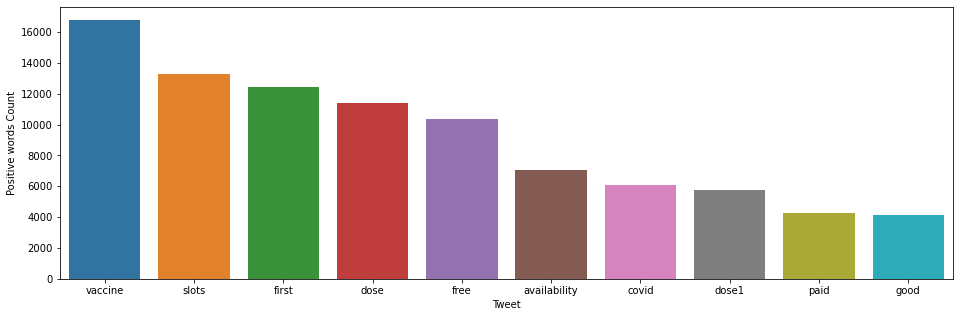

In [18]:
import seaborn as sns
a = nltk.FreqDist(count_pos)
d = pd.DataFrame({'Tweet': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent words    
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Tweet", y = "Count")
ax.set(ylabel = 'Positive words Count')
plt.show()

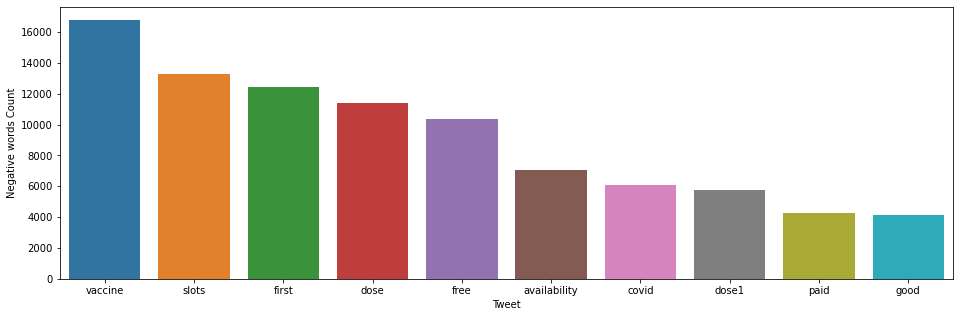

In [19]:
import seaborn as sns
b = nltk.FreqDist(count_pos)
e = pd.DataFrame({'Tweet': list(b.keys()),
                  'Count': list(b.values())})
# selecting top 10 most frequent words    
e = e.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Tweet", y = "Count")
ax.set(ylabel = 'Negative words Count')
plt.show()

In [21]:
SentimentText = tweet_df['text']
sentiment_text_list = SentimentText
textfile = open("C:/Users/prave/Module-20/covidvaccine.txt", "w")
for element in sentiment_text_list:
        textfile.write(element + "\n")
textfile.close()

In [25]:
# function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text( j, i, format(cm[i, j, ], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Vectorizer

In [26]:
#Vectorizer 1: Finding the unigram representation
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()

In [27]:
# fitting the vectorizer
X=vectorizer.fit_transform(SentimentText)


In [28]:
# getting the target values i.e wheather the tweets are positive or negative
train_data = tweet_df
y = train_data['sentiment']

In [29]:
X.shape

(228207, 48111)

In [30]:
y.shape

(228207,)

# TRAIN AND TEST

In [31]:
# splitting into training and testing set so as to evaluate the classifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train ,y_test = train_test_split(X,y,train_size = .8 , test_size = .2 , random_state = 0)

In [32]:
# fitting the multinomial bayes classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [33]:
clf.score(X_train,y_train)

0.8935721523840824

In [34]:
y_pred = clf.predict(X_test)
# testing score
clf.score(X_test, y_test)

0.85572499014066

# CONFUSION MATRIX

Confusion matrix, without normalization
[[ 3125   149  1009]
 [ 1304 21979  3646]
 [  306   171 13953]]
Confusion matrix, without normalization
[[ 3125   149  1009]
 [ 1304 21979  3646]
 [  306   171 13953]]


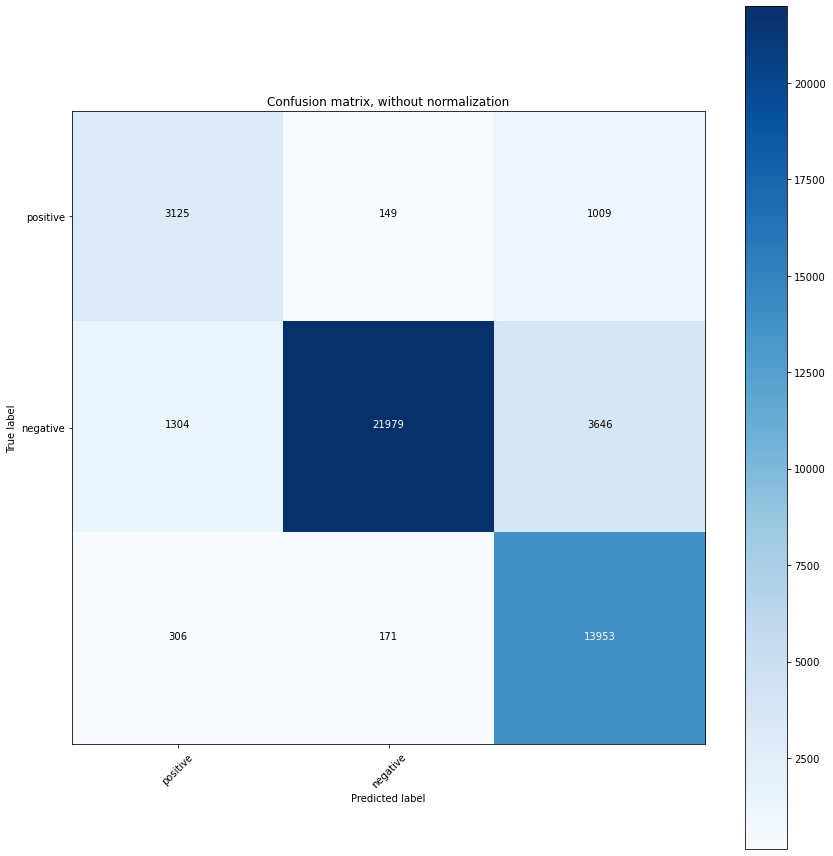

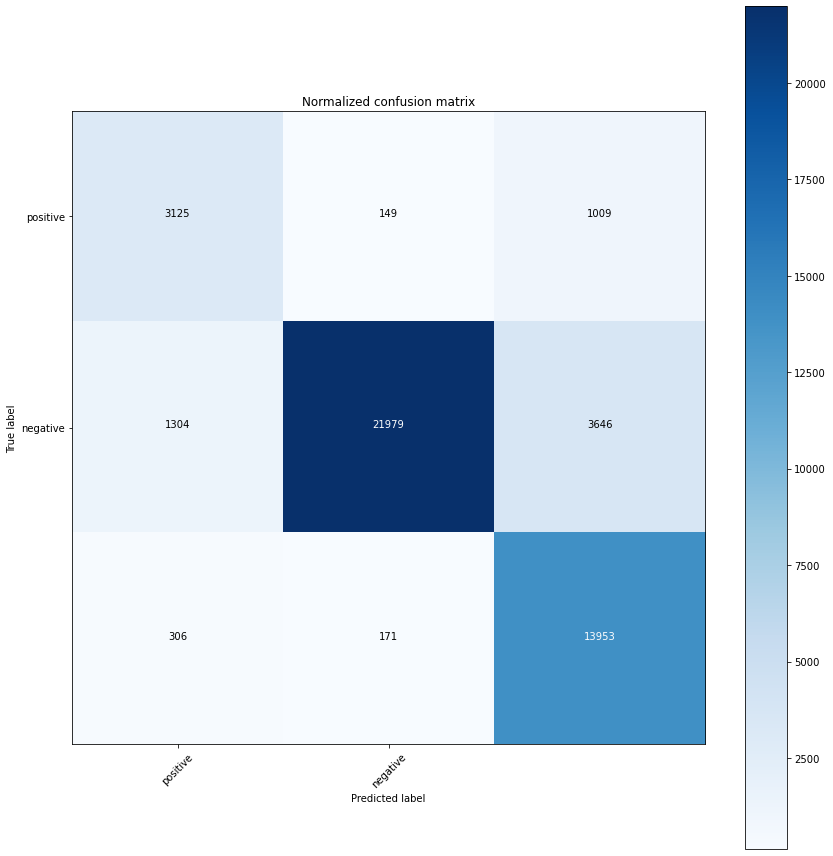

In [35]:
# Compute confusion matrix
   
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
plt.figure(figsize=(12,12))
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(12,12))
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"], 
                      title='Normalized confusion matrix')
plt.show()